<a href="https://colab.research.google.com/github/trissentety/Python-Machine-Learning/blob/main/FCC_Magic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [9]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [10]:
df["class"] = (df["class"] == "g").astype(int) #g for 1 = True & h for 0 = False

In [11]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


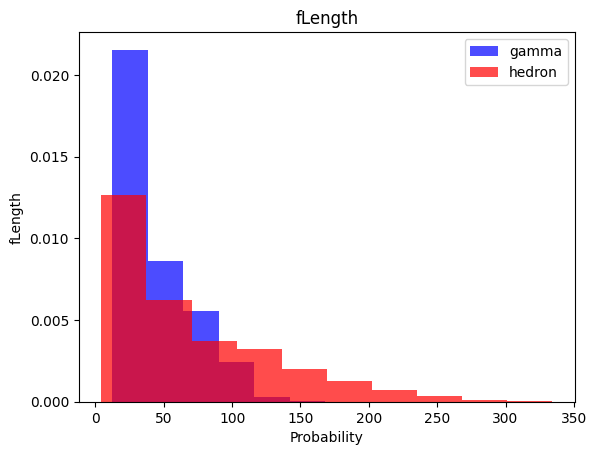

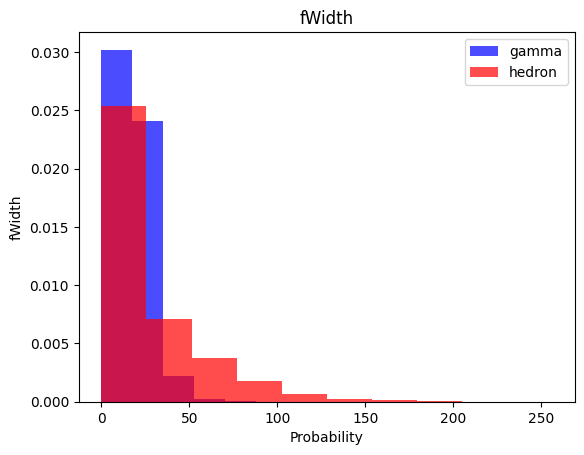

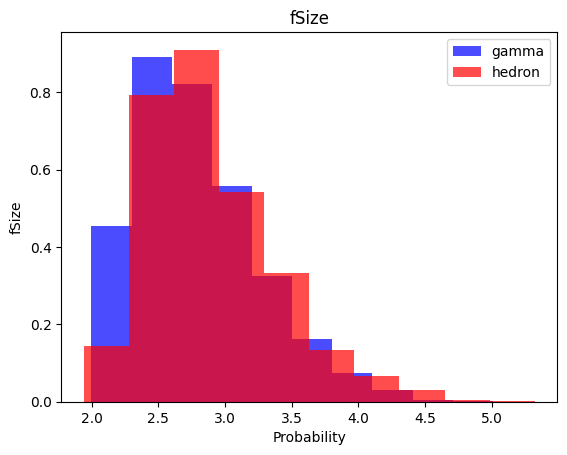

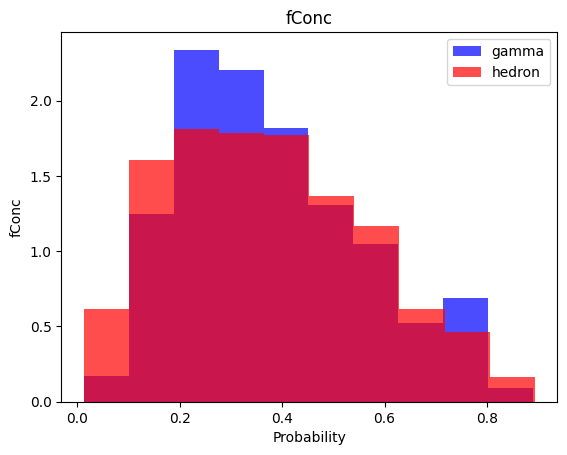

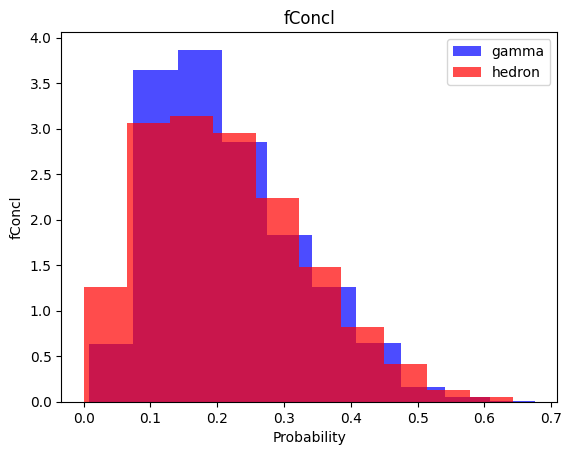

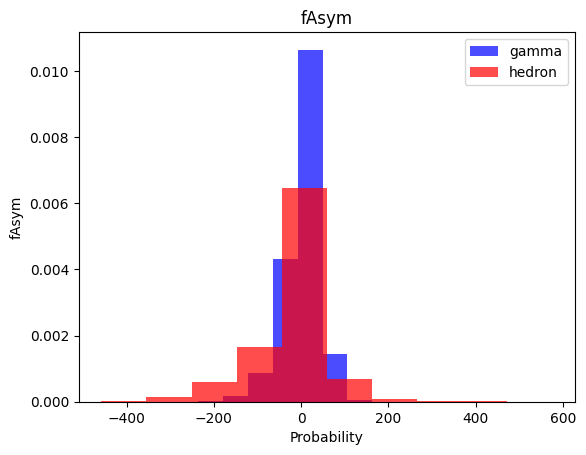

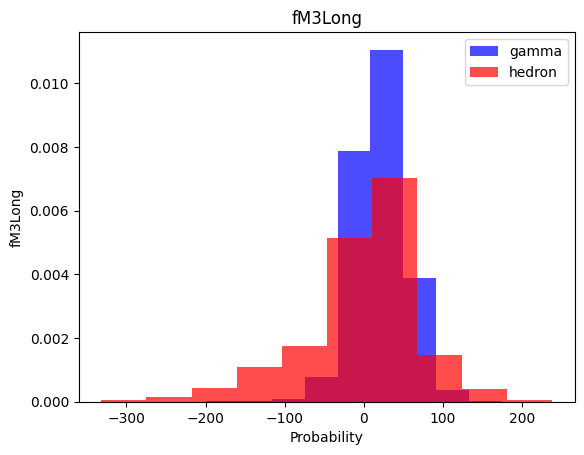

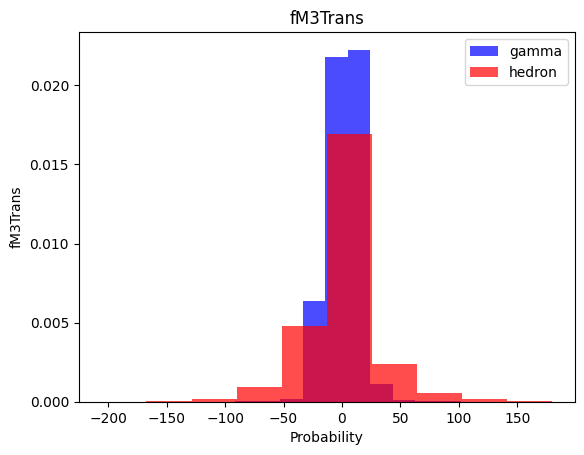

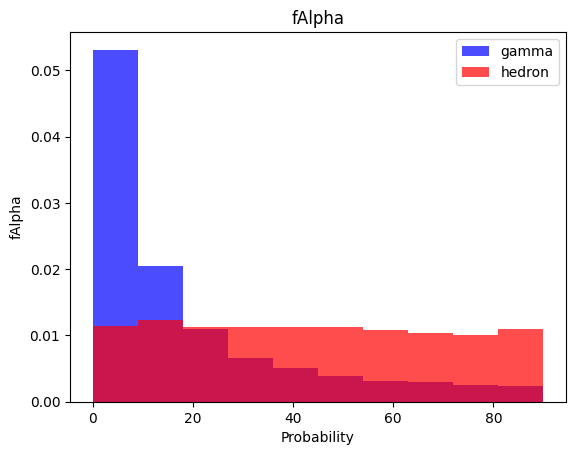

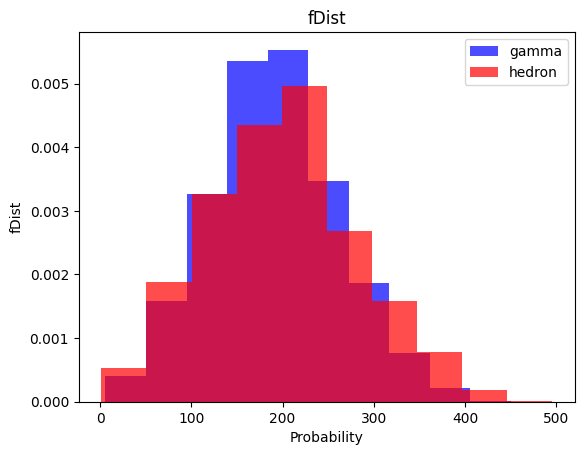

In [12]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hedron', alpha=0.7, density=True) #density normalizes distributions ex 200 on one 50 on other makes hard to compare difference
  plt.title(label)
  plt.xlabel("Probability") #because density
  plt.ylabel(label)
  plt.legend()
  plt.show()

Train, Validation and Test Datasets

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #sample shuffles data, location of split. 60-80% goes toward validation and 80-100% is test data

Scale data to be relative to mean and standard deviation due to 100+ values and 0.~ value differences

In [14]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values #last item is label
  y = dataframe[dataframe.columns[-1]].values #last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X)#fit and transform x. Take x and fit StandardScaler to x then transorm all values as new x

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) #take more from less class and keep resampling to increase size of smaller class so it matches other class
#-1 same as len(y). reshapes y into 2d array
  data = np.hstack((X, np.reshape(y, (-1, 1)))) #make whole dataset as 2d numpy array. hstack takes an array and another array and horizontally stack them together side by side
  return data, X, y

In [15]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0])) #gamma

7437
3975


Because the 2 numbers above are so different the training data set needs oversampled by increasing number of class 0 to match class 1

In [16]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_train, y_train = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [17]:
len(y_train)

3804

In [18]:
sum(y_train == 1)

2435

In [19]:
sum(y_train == 0)

1369

K Nearest neighbors
K Being number of points using Euclidian distance

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3) #number of neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [24]:
y_test

array([1, 0, 1, ..., 1, 1, 0])

accuracy is closes points which is how many points are right out of total.
precision is what is positively labled by model inside circle that are truly positive and right.
so how many are actually positive from labels.
recall.
f1 is combination of precision and recall.



In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1344
           1       0.83      0.92      0.87      2460

    accuracy                           0.83      3804
   macro avg       0.83      0.79      0.80      3804
weighted avg       0.83      0.83      0.82      3804



Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [28]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50      1344
           1       0.73      0.91      0.81      2460

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      1344
           1       0.81      0.89      0.85      2460

    accuracy                           0.80      3804
   macro avg       0.78      0.76      0.77      3804
weighted avg       0.79      0.80      0.79      3804



#Support Vector Machines.
Seperating 2 classes with a line or plane.




In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [34]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1344
           1       0.86      0.95      0.91      2460

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Nearual Networks


In [35]:
import tensorflow as tf

In [49]:
def plot_history(history): #plotting loss over epochs
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch') #Training cycle
  ax2.set_ylabel('Accuracy') #accuracy over epochs
  ax2.grid(True)

  plt.show()



In [50]:
plot_history(history)

NameError: ignored

In [37]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs) :
  nn_model = tf.keras.Sequential([ #layer things passed in as a model
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), #connected to every neuron
      tf.keras.layers.Dropout(dropout_prob), #probability of turning off node during training
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid') #[round to 0 or 1]
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0 #validation leave this amount in percent out, verbose means don't print anything
  )
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


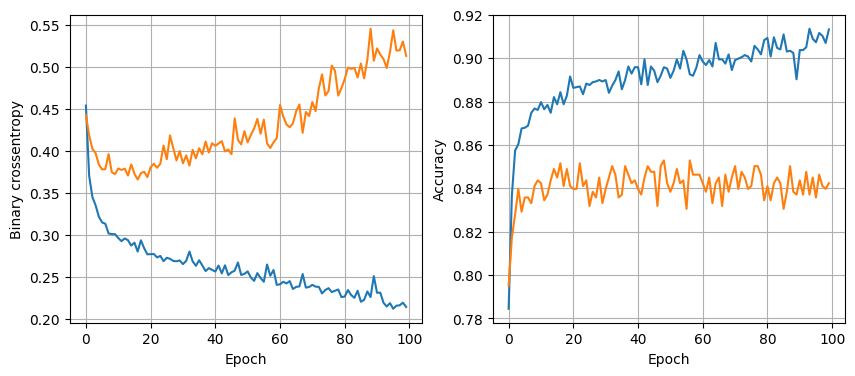

NameError: ignored

In [55]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in[0, 0.2]:
      for lr in [0.01, 0.005, 0.001]:
        for batch_size in [32,64,128]:
          print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
          model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
          plot_history(history)
          val_loss = model.evaluate(X_valid, y_valid)
          if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model


In [58]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)


AttributeError: ignored

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1344
           1       0.86      0.95      0.91      2460

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Linear Regression


*   Finding line of best fit
*   y = b0 + b1 x
*   b1 defines slope of y

Residual/error is how far off is prediction from data point already had.
yi - y^i.
Line of best fit tries to decrease residuals as much as possible.

Multiple Linear Regression:
y = b0 + b1x1 + b2x2 + bnxn

Linearity is if data follows a linear pattern
Curved line is not linearity.

Independence means all points in data set should be independent meaning they shouldn't rely on or affect one another.

Residual plot is how values are distributed around line of best fit.

Normality - normal distribution
Homoskedasticity - variance of points should remain constant

Mean Absolute Error - Take all errors and sum distance and take average to describe how far off. Summing up all datapoints distance from line and dividing by number of data points. (MAE)

Mean Squared Error - Instead of absolute value it is sqaured
Errors squared before summing together and divided by n which helps to punish large errors.

Root Mean Squared Error - Taking squared root of mean squared error

R squared - Coefficient of Determination
R2 = 1 - RSS / TSS
RSS is sum of squared residuals
RSS = Sum of all values (yi - y^i)Squared

TSS is Total sum of squares. Take each y value and subtract mean of all y values and sqaure it.


